In [1]:
import pandas as pd
  

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
pd.set_option('display.max_columns',None)

In [6]:
df = pd.read_csv("C:\\Users\\mayur\\Desktop\\Project 1\\StudentsPerformance.csv")

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
print("Dataset shape:",df.shape)
print("\nData Info:")
print(df.info())

Dataset shape: (1000, 8)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [9]:
print("\nStatistical summary:")
print(df.describe())


Statistical summary:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [10]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [17]:
df = pd.read_csv(r"C:\Users\mayur\Desktop\Project 1\StudentsPerformance.csv", encoding='utf-8')
print(df.columns)


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


In [18]:
print("Missing values in each columns")
print(df.isnull().sum())

Missing values in each columns
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [20]:
print(df.columns.tolist())


['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


In [21]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('/', '_')
)
print(df.columns)


Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')


In [22]:
# Create total and average score columns
df['total_score'] = df[['math_score', 'reading_score', 'writing_score']].sum(axis=1)
df['average_score'] = df['total_score'] / 3

# Grade category
def get_grade(avg):
    if avg >= 90:
        return 'A'
    elif avg >= 80:
        return 'B'
    elif avg >= 70:
        return 'C'
    elif avg >= 60:
        return 'D'
    else:
        return 'F'

df['grade'] = df['average_score'].apply(get_grade)

df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,C
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,B
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,F
4,male,group C,some college,standard,none,76,78,75,229,76.333333,C


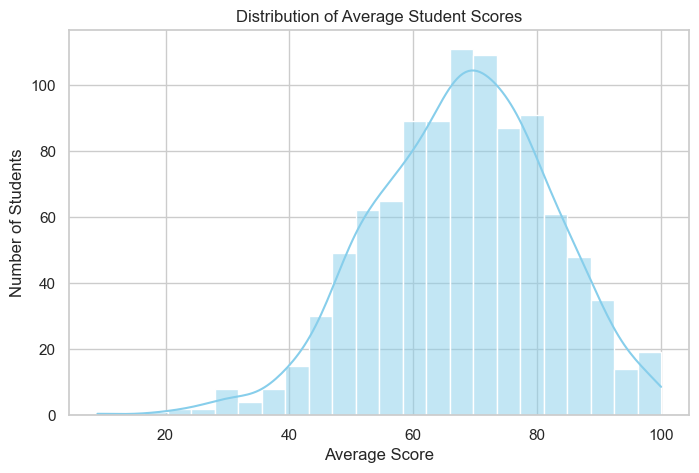

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['average_score'], kde=True, color='skyblue')
plt.title("Distribution of Average Student Scores")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")
plt.show()


C:\Users\mayur\AppData\Local\Temp\ipykernel_7784\2414071443.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='average_score', data=df, palette='cool')


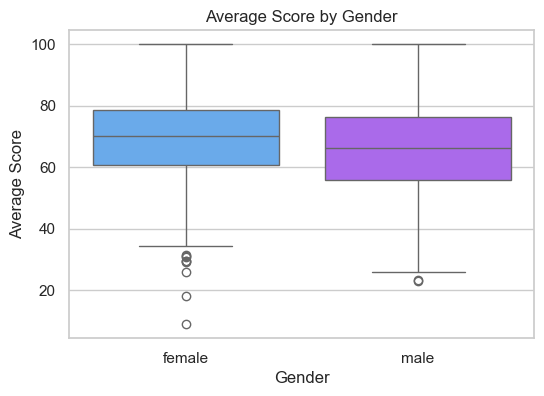

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(x='gender', y='average_score', data=df, palette='cool')
plt.title("Average Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Score")
plt.show()


C:\Users\mayur\AppData\Local\Temp\ipykernel_7784\348488059.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='parental_level_of_education', y='average_score', data=df, palette='viridis')


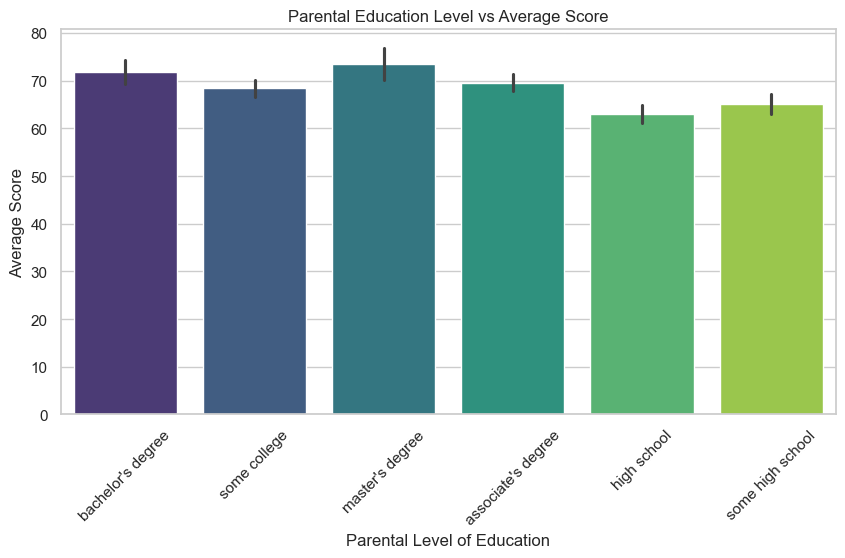

In [25]:
plt.figure(figsize=(10,5))
sns.barplot(x='parental_level_of_education', y='average_score', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title("Parental Education Level vs Average Score")
plt.xlabel("Parental Level of Education")
plt.ylabel("Average Score")
plt.show()


C:\Users\mayur\AppData\Local\Temp\ipykernel_7784\3457552903.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='test_preparation_course', y='average_score', data=df, palette='pastel')


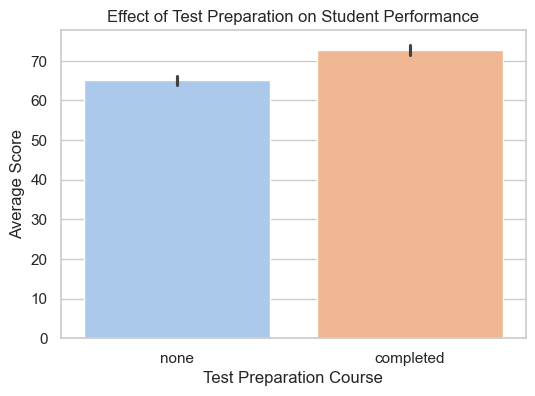

In [26]:
plt.figure(figsize=(6,4))
sns.barplot(x='test_preparation_course', y='average_score', data=df, palette='pastel')
plt.title("Effect of Test Preparation on Student Performance")
plt.xlabel("Test Preparation Course")
plt.ylabel("Average Score")
plt.show()


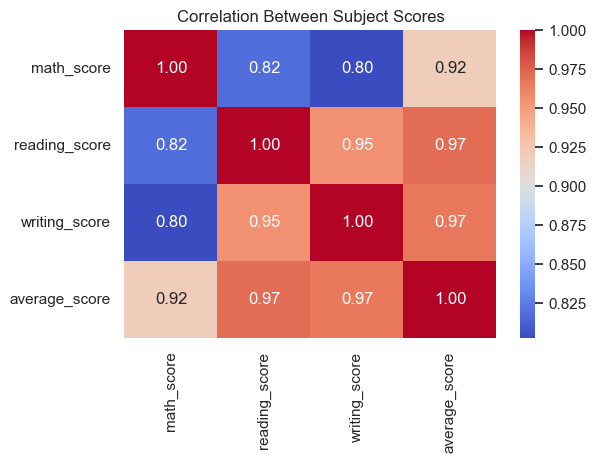

In [27]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['math_score', 'reading_score', 'writing_score', 'average_score']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Subject Scores")
plt.show()


In [28]:
df.to_csv("Cleaned_StudentPerformance.csv", index=False)
print("✅ Cleaned dataset exported successfully!")


✅ Cleaned dataset exported successfully!
